# **OUTLET STORES' PERFORMANCE RESEARCH**

# Describing project

In this project I will assess the performance of the sales outlets of a building-materials retailer.

The data is compiled from a table with the purchases made at the different stores of the chain and from a table with the prices of the products.

The end goal is to increase the overall profits of the chain, by finding the successful and failing stores, understanding their properties, and making better business decisions.

The main steps of the project will be:
- Loading the data.
- Preparing the data for analysis by discovering and treating issues.
- Carrying out exploratory data analysis.
- Assessing the performance of the sales outlets.
- Testing statistical hypotheses.
- Drawing conclusions and formulating recommendations.
- Preparing a presentation to present the findings.
- Preparing a Tableau dashboard to present the findings.

# Importing modules

In [ ]:
# Importing the required modules
# Mathematical modules
import pandas as pd
import numpy as np
import scipy.stats as st

# Plotting modules
import matplotlib.pyplot as plt

In [ ]:
# Extending the shown fields of the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# Loading data

## Setting file paths

In [ ]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - A local runtime.
# 2 - A hosted runtime on Yandex Jupyterhub.
# 3 - A hosted runtime on Google colaboratory.
runtime_type = 2

# To connect to a local runtime use the command:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# Setting file paths
file_path_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Notebooks - Yandex Practicum/'
file_path_yandex = '/datasets/'
file_path_google_colab = '/content/drive/My Drive/Colab Notebooks/Notebooks - Yandex Practicum/'

if runtime_type == 1:
    print('A local runtime was chosen.\n')
    file_path = file_path_local

elif runtime_type == 2:
    print('A hosted runtime on Yandex Jupyterhub was chosen.\n')
    file_path = file_path_yandex
    
elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    file_path = file_path_google_colab

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either 1, 2 or 3.')

A hosted runtime on Google colaboratory was chosen.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [ ]:
# Loading the data
data_purchases = pd.read_csv(file_path + 'retail_dataset_us.csv')
data_products = pd.read_csv(file_path + 'product_codes_us.csv', sep=';')

## Exploring data generally

### Purchases data

In [ ]:
# Exploring the general information of data_purchases
print('Printing the general information for data_purchases:\n')
print(data_purchases.info(memory_usage='deep'))

Printing the general information for data_purchases:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.0 MB
None


In [ ]:
# Printing some of the first rows
print('Printing some of the first rows:\n')
display(data_purchases.head(10))

Printing some of the first rows:



,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,1,Shop 1


In [ ]:
# Calculating general statistics
for column_name in data_purchases.columns:
    print(f'Describing the "{column_name}" column:\n', data_purchases[column_name].describe())
    print()

Describing the "purchaseid" column:
 count     105335
unique      4894
top       537434
freq         675
Name: purchaseid, dtype: object

Describing the "item_ID" column:
 count     105335
unique      3159
top       85123A
freq         565
Name: item_ID, dtype: object

Describing the "Quantity" column:
 count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: Quantity, dtype: float64

Describing the "purchasedate" column:
 count                  105335
unique                   4430
top       2016-12-06 16:57:00
freq                      675
Name: purchasedate, dtype: object

Describing the "CustomerID" column:
 count    69125.000000
mean     21019.302047
std       1765.444679
min      18025.000000
25%      19544.000000
50%      20990.000000
75%      22659.000000
max      23962.000000
Name: CustomerID, dtype: float64

Describing the "loyalty_program" colum

### Products data

In [ ]:
# Exploring the general information of data_products
print('Printing the general information for data_products:\n')
print(data_products.info(memory_usage='deep'))

Printing the general information for data_products:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 217.0 KB
None


In [ ]:
# Printing some of the first rows
print('Printing some of the first rows:\n')
display(data_products.head(10))

Printing some of the first rows:



,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
5,10124G,0.42
6,10125,0.42
7,10133,0.42
8,10135,0.42
9,11001,1.69


In [ ]:
# Calculating general statistics
for column_name in data_products.columns:
    print(f'Describing the "{column_name}" column:\n', data_products[column_name].describe())
    print()

Describing the "productID" column:
 count      3159
unique     3159
top       20759
freq          1
Name: productID, dtype: object

Describing the "price_per_one" column:
 count    3159.000000
mean        2.954495
std         7.213808
min         0.000000
25%         0.650000
50%         1.450000
75%         3.290000
max       175.000000
Name: price_per_one, dtype: float64



## Conclusions

The following issues can be seen in the data_purchases table:
- The column names don't have a uniform format.
- The "quantity" column has negative values.
- The data type of the "purchase_date" column should be converted to the datetime type, since it contained dates & times.
- The "customer_id" column has about a 1/3 of its values missing.

The following issues can be seen in the data_products table:
- The column names don't have a uniform format.

Further investigation is required to spot incorrect values, missing values and duplicated rows.

# Preparing data

## Purchases data

### Renaming columns

In [ ]:
# Renaming columns
data_purchases.columns = \
    ['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'loyalty_program', 'shop_id']

# Viewing the changes
print(data_purchases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   shop_id          105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB
None


### Treating data types

In [ ]:
# Converting data types
data_purchases['purchase_date'] = pd.to_datetime(data_purchases['purchase_date'], format='%Y-%m-%d %H:%M:%S')

# Presenting the data types of the different variables
print('The data types in data_purchases are:\n')
print(data_purchases.info(), '\n')

# Printing some of the first rows
print('Printing some of the first rows:\n')
display(data_purchases.head(5))

The data types in data_purchases are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB
None 

Printing some of the first rows:



,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


### Treating missing values

In [ ]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column in data_purchases are:\n')
print(100 * data_purchases.isna().sum() / len(data_purchases))

The percentages of missing values per column in data_purchases are:

purchase_id         0.000000
item_id             0.000000
quantity            0.000000
purchase_date       0.000000
customer_id        34.376038
loyalty_program     0.000000
shop_id             0.000000
dtype: float64


The shops with missing customer IDs are:



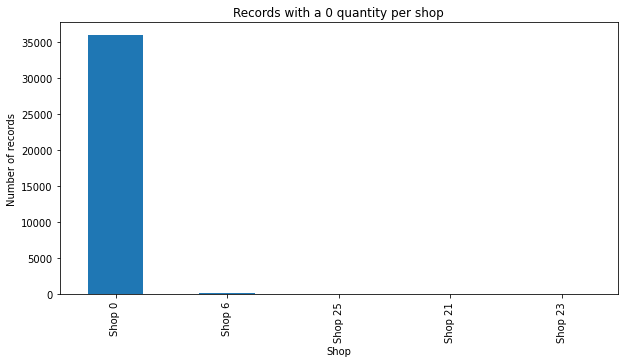

In [ ]:
# Looking at the shops with missing customer IDs
print('The shops with missing customer IDs are:\n')
plt.figure(figsize=(10,5))
data_purchases[pd.isna(data_purchases['customer_id'])]['shop_id'].value_counts().plot.bar(y='shop_id')
plt.title('Records with a 0 quantity per shop')
plt.ylabel('Number of records')
plt.xlabel('Shop')
plt.show()

### Treating duplicates

In [ ]:
# Looking for duplicated rows
num_rows = len(data_purchases)
num_duplicated = data_purchases.duplicated().sum()

print('The total number of rows in data_purchases is {}.'.format(num_rows))
print('The total number of duplicated rows is {} ({:.2f}%).'
      .format(num_duplicated, 100*num_duplicated/num_rows))
print('The number of unique purchase IDs is {}.\n'
     .format(data_purchases['purchase_id'].nunique()))

# Removing duplicated rows
data_purchases = data_purchases.drop_duplicates().reset_index(drop=True)
num_rows = len(data_purchases)
num_duplicated = data_purchases.duplicated().sum()

print('The total number of rows after removing duplicated rows is {}.'.format(num_rows))
print('The total number of duplicated rows is {} ({:.2f}%).'
      .format(num_duplicated, 100*num_duplicated/num_rows))
print('The number of unique purchase IDs is {}.\n'
     .format(data_purchases['purchase_id'].nunique()))

The total number of rows in data_purchases is 105335.
The total number of duplicated rows is 1033 (0.98%).
The number of unique purchase IDs is 4894.

The total number of rows after removing duplicated rows is 104302.
The total number of duplicated rows is 0 (0.00%).
The number of unique purchase IDs is 4894.



### Treating incorrect values

There are 104302 records on purchases.
There are 4894 unique purchases.



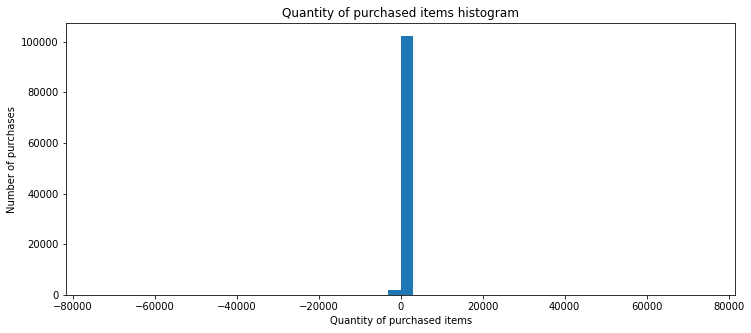

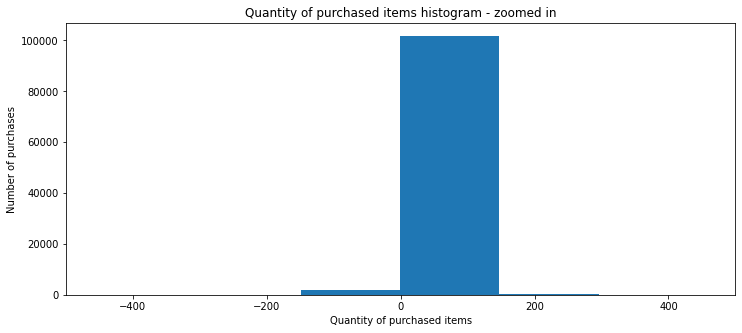

In [ ]:
# Exploring the "quantity" column
print('There are {} records on purchases.'.format(len(data_purchases)))
print('There are {} unique purchases.'.format(data_purchases['purchase_id'].nunique()))
print()

plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=50)
plt.title('Quantity of purchased items histogram')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=1000)
plt.title('Quantity of purchased items histogram - zoomed in')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.xlim(-500,500)
plt.show()

There are 32362 records with a quantity value of 0, which are 31.03% of the records.
The shops with records with a 0 quantity are:



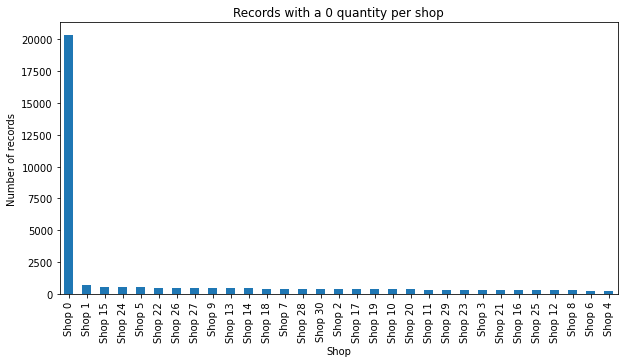


There are now 0 records with a quantity value of 0, which are 0.00% of the records.


In [ ]:
# Exploring quantity values of 0
num_records_zero_quantity = len(data_purchases.query('quantity == 0'))
print('There are {} records with a quantity value of 0, which are {:.2%} of the records.'
      .format(num_records_zero_quantity,
              num_records_zero_quantity/len(data_purchases)))

print('The shops with records with a 0 quantity are:\n')
plt.figure(figsize=(10,5))
data_purchases.query('quantity == 0')['shop_id'].value_counts().plot.bar(y='shop_id')
plt.title('Records with a 0 quantity per shop')
plt.ylabel('Number of records')
plt.xlabel('Shop')
plt.show()
print()

# Removing quantity values of 0
data_purchases = data_purchases.query('quantity != 0')
num_records_zero_quantity = len(data_purchases.query('quantity == 0'))
print('There are now {} records with a quantity value of 0, which are {:.2%} of the records.'
      .format(num_records_zero_quantity,
              num_records_zero_quantity/len(data_purchases)))

There are now 2076 records with a negative quantity, which are 2.89% of the records.
The shops with records with a 0 quantity are:



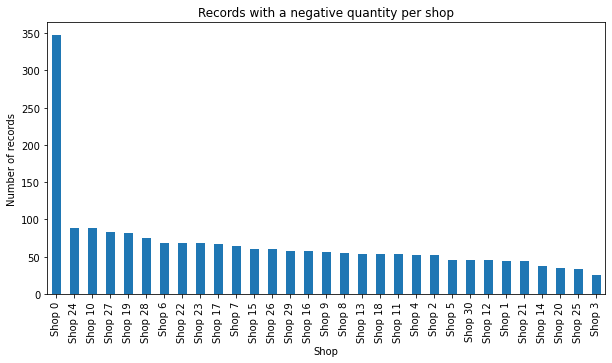


There are now 0 records with a negative quantity, which are 0.00% of the records.


In [ ]:
# Treating negative quantity values
num_records_negative_quantity = len(data_purchases.query('quantity < 0'))
print('There are now {} records with a negative quantity, which are {:.2%} of the records.'
      .format(num_records_negative_quantity,
              num_records_negative_quantity/len(data_purchases)))

print('The shops with records with a 0 quantity are:\n')
plt.figure(figsize=(10,5))
data_purchases.query('quantity < 0')['shop_id'].value_counts().plot.bar(y='shop_id')
plt.title('Records with a negative quantity per shop')
plt.ylabel('Number of records')
plt.xlabel('Shop')
plt.show()
print()

# Taking the absolute value of the quantity values
data_purchases['quantity'] = abs(data_purchases['quantity'])
num_records_negative_quantity = len(data_purchases.query('quantity < 0'))
print('There are now {} records with a negative quantity, which are {:.2%} of the records.'
      .format(num_records_negative_quantity,
              num_records_negative_quantity/len(data_purchases)))

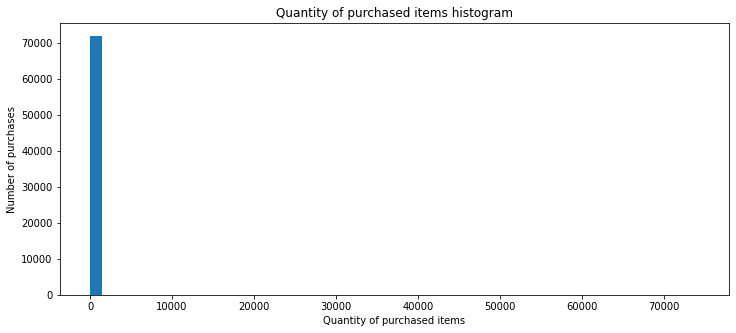

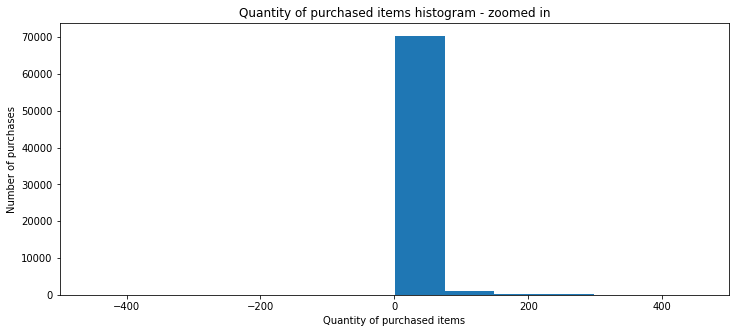

In [ ]:
# Plotting the resulting distribution of the "quantity" variable
plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=50)
plt.title('Quantity of purchased items histogram')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=1000)
plt.title('Quantity of purchased items histogram - zoomed in')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.xlim(-500,500)
plt.show()

### Conclusions

- The column names were changed to fit a uniform format.
- The data type of the "purchase_date" column was converted to the datetime type, since it contained dates & times.
- The "customer_id" column had about a 1/3 of its values missing. Due to the large percentage of the missing values and the non-criticality of filling them, the rows with the missing values weren't removed. These missing values almost entirely belonged to shop 0, and the entire process by which customer IDs from shop 0 reach the database should be investigated.
- The data contained about 1% of duplicated rows, which were removed.
- The data contained about 30% of records with a quantity value of 0, which were removed. Such records could have originated from canceled purchases or an error made by the workers or in the database. The data also contained about 3% of records with negative quantities, which were converted to positive values. Such records could have originated from a typo. These incorrect values were especially prominent in shop 0, and should be investigated.

## Products data

### Renaming columns

In [ ]:
# Renaming columns
data_products.columns = ['product_id', 'price_per_one']

# Viewing the changes
print(data_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB
None


### Treating data types

In [ ]:
# Presenting the data types of the different variables
print('The data types in data_products are:\n')
print(data_products.info(), '\n')

# Printing some of the first rows
print('Printing some of the first rows:\n')
display(data_products.head(5))

The data types in data_products are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB
None 

Printing some of the first rows:



,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


### Treating missing values

In [ ]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column in data_products are:\n')
print(100 * data_products.isna().sum() / len(data_products))

The percentages of missing values per column in data_products are:

product_id       0.0
price_per_one    0.0
dtype: float64


### Treating duplicates

In [ ]:
# Looking for duplicated rows
num_rows = len(data_products)
num_duplicated = data_products.duplicated().sum()

print('The total number of rows in data_products is {}.'.format(num_rows))
print('The total number of duplicated rows is {} ({:.2f}%).'
      .format(num_duplicated, 100*num_duplicated/num_rows))
print('The number of unique product IDs is {}.\n'
     .format(data_products['product_id'].nunique()))

The total number of rows in data_products is 3159.
The total number of duplicated rows is 0 (0.00%).
The number of unique product IDs is 3159.



### Conclusions

- The column names were changed to fit a uniform format.
- The data types were correct.
- The data didn't contain missing values.
- The data didn't contain duplicated rows.


# Exploring data

## Purchases data

### Exploring variables

In [ ]:
# Exploring the "purchase_id" variable
print('There are {} purchase records.'.format(len(data_purchases)))
print('There are {} unique purchase IDs.\n'
      .format(data_purchases['purchase_id'].nunique()))

There are 71940 purchase records.
There are 4729 unique purchase IDs.



In [ ]:
# Exploring the "item_id" variable
print('There are {} unique items.\n'
      .format(data_purchases['item_id'].nunique()))

There are 2849 unique items.



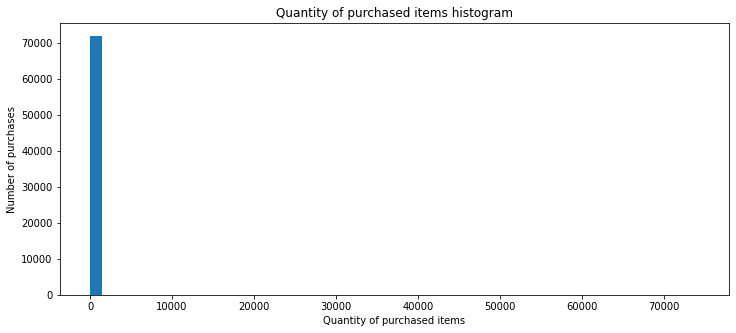

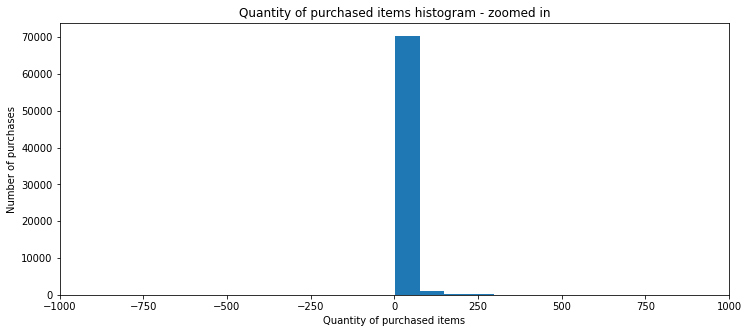

In [ ]:
# Exploring the "quantity" variable
plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=50)
plt.title('Quantity of purchased items histogram')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(data_purchases['quantity'], bins=1000)
plt.title('Quantity of purchased items histogram - zoomed in')
plt.ylabel('Number of purchases')
plt.xlabel('Quantity of purchased items')
plt.xlim(-1000,1000)
plt.show()

The distribution of the quantity of items per purchase is sharply peaked near 0 and is positively skewed, where only a small number of purchases contained quantities of over 200 items, but some of these outliers reach up to tens of thousands of units.
We can also see that there are negative amounts of quantities which we'll need to addresss.

In [ ]:
# Exploring the "purchase_date" variable
print('The data was collected between {} and {}.\n'
      .format(data_purchases['purchase_date'].min(), data_purchases['purchase_date'].max()))

The data was collected between 2016-12-01 08:26:00 and 2017-02-28 17:04:00.



In [ ]:
# Exploring the "customer_id" variable
customer_ids = pd.DataFrame(data_purchases['customer_id'].dropna().unique(), columns=['customer_id'])
print('There are {} unique customers.\n'
      .format(data_purchases['customer_id'].nunique()))

There are 1740 unique customers.



The number of unique customers is 1740.
The number of unique customers with unique loyalty program values is 1740.

The number of customers who are and aren't in the loyalty program are:
 0    1156
1     584
Name: loyalty_program, dtype: int64 



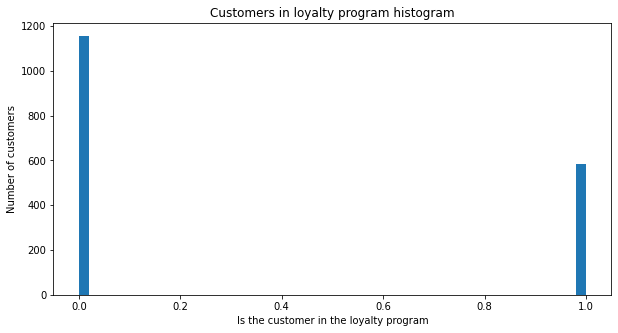

In [ ]:
# Exploring the "loyalty_program" variable
customers_loyalty = data_purchases[['customer_id','loyalty_program']] \
                            .dropna().drop_duplicates().reset_index(drop=True)

# Checking if every customer either belongs to a loyalty program or not
print('The number of unique customers is {}.'.format(data_purchases['customer_id'].nunique()) )
print('The number of unique customers with unique loyalty program values is {}.\n'
      .format(len(customers_loyalty)) )

print('The number of customers who are and aren\'t in the loyalty program are:\n',
      customers_loyalty['loyalty_program'].value_counts(), '\n')

plt.figure(figsize=(10,5))
plt.hist(customers_loyalty['loyalty_program'], bins=50)
plt.title('Customers in loyalty program histogram')
plt.ylabel('Number of customers')
plt.xlabel('Is the customer in the loyalty program')
plt.show()

The number of customers who aren't in the loyalty program is almost twice the number of those in the program.

There are 31 unique shops.



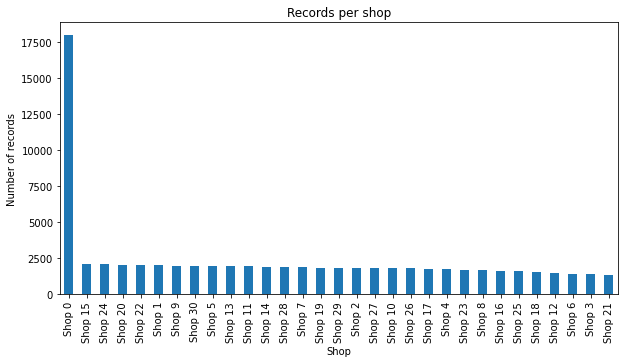

In [ ]:
# Exploring the "shop_id" variable
print('There are {} unique shops.\n'
      .format(data_purchases['shop_id'].nunique()))

plt.figure(figsize=(10,5))
data_purchases['shop_id'].value_counts().plot.bar(y='shop_id')
plt.title('Records per shop')
plt.ylabel('Number of records')
plt.xlabel('Shop')
plt.show()

Shop 0 has an overwhelmingly larger amount of purchase records than the other shops.

### Conclusions

- There are 71940 purchase records.

- There are 4729 unique purchase IDs.

- There are 2849 unique items.

- The distribution of the quantity of items per purchase is sharply peaked near 0 and is positively skewed, where only a small number of purchases contained quantities of over 200 items, but some of these outliers reach up to tens of thousands of units. We can also see that there are negative amounts of quantities which we'll need to addresss.

- The data was collected between 2016-12-01 08:26:00 and 2017-02-28 17:04:00.

- There are 1740 unique customers.

- The number of customers who aren't in the loyalty program is almost twice the number of those in the program.

- There are 31 unique shops, but shop 0 has an overwhelmingly larger amount of purchase records than the other shops.


## Products data

### Exploring variables

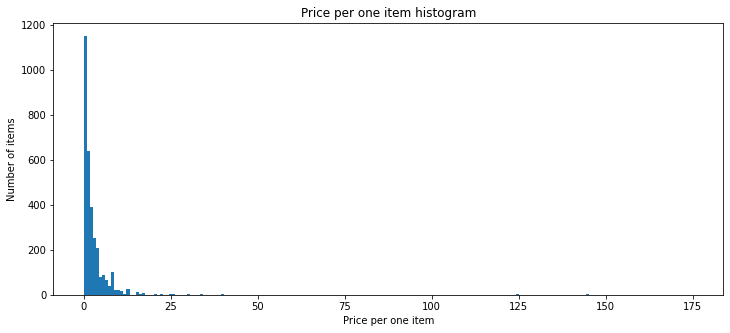

In [ ]:
# Exploring the "price_per_one" variable
plt.figure(figsize=(12,5))
plt.hist(data_products['price_per_one'], bins=200)
plt.title('Price per one item histogram')
plt.ylabel('Number of items')
plt.xlabel('Price per one item')
plt.show()

The distribution of the price per one item is sharply peaked near 0 and is positively skewed, where only a small number of items cost more than 10-20 USD per unit, but some of these outliers reach up to hunderds of USD.

### Conclusions

- The number of unique items in both tables is equal.

- The distribution of the price per one item is sharply peaked near 0 and is positively skewed, where only a small number of items cost more than 10-20 USD per unit, but some of these outliers reach up to hunderds of USD.

# Assessing performance

## Calculating useful variables

In [ ]:
# Calculating useful variables

# Adding the price per one product
data_purchases = data_purchases.merge(right=data_products,
                                      how='inner',
                                      left_on='item_id',
                                      right_on='product_id')

# Adding the revenue per purchase
data_purchases['revenue'] = data_purchases['quantity'] * data_purchases['price_per_one'] 

# Adding the purchase month to the data
data_purchases['purchase_month'] = data_purchases['purchase_date'].dt.strftime('%Y-%m')

unique_months = data_purchases['purchase_month'].unique()
print('There are {} unique months in the data:'.format(len(unique_months)))
print(unique_months, '\n')

# Presenting data
print('Presenting the "data_purchases" dataframe:\n')
print(data_purchases.info(), '\n')
print(data_purchases.head(5))

There are 3 unique months in the data:
['2016-12' '2017-01' '2017-02'] 

Presenting the "data_purchases" dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71940 entries, 0 to 71939
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      71940 non-null  object        
 1   item_id          71940 non-null  object        
 2   quantity         71940 non-null  int64         
 3   purchase_date    71940 non-null  datetime64[ns]
 4   customer_id      55672 non-null  float64       
 5   loyalty_program  71940 non-null  int64         
 6   shop_id          71940 non-null  object        
 7   product_id       71940 non-null  object        
 8   price_per_one    71940 non-null  float64       
 9   revenue          71940 non-null  float64       
 10  purchase_month   71940 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 6.6+ MB
None

In [ ]:
# Calculating the revenue of each shop from the price of the loyalty program
# Each such customer brings in extra monthly revenue and receives discounts, gifts, etc.
loyalty_program_price = 20

# Calculating the number of unique royalty program customers per shop per month
loyalty_customers_per_shop_per_month = data_purchases.query('loyalty_program == 1') \
    .groupby(['shop_id','purchase_month'], as_index=False)['customer_id'].nunique()
loyalty_customers_per_shop_per_month.columns = ['shop_id','purchase_month','loyalty_customers']
print('Presenting "loyalty_customers_per_shop_per_month":\n',
      loyalty_customers_per_shop_per_month.head(5), '\n')

# Calculating the number of unique royalty program customers per shop
total_loyalty_customers_per_shop = \
    loyalty_customers_per_shop_per_month.groupby('shop_id')['loyalty_customers'].sum() \
    .to_frame().reset_index()
print('Presenting "total_loyalty_customers_per_shop":\n',
      total_loyalty_customers_per_shop.head(5), '\n')

# Calculating the total revenue of each shop from the price of the loyalty program
total_loyalty_revenue_per_shop = total_loyalty_customers_per_shop.copy(deep=True)
total_loyalty_revenue_per_shop['loyalty_revenue'] = \
    total_loyalty_revenue_per_shop['loyalty_customers'] * loyalty_program_price
total_loyalty_revenue_per_shop = \
    total_loyalty_revenue_per_shop.drop(columns=['loyalty_customers'])
print('Presenting "total_loyalty_revenue_per_shop":\n',
      total_loyalty_revenue_per_shop.head(5))

Presenting "loyalty_customers_per_shop_per_month":
   shop_id purchase_month  loyalty_customers
0  Shop 0        2016-12                 18
1  Shop 0        2017-01                 14
2  Shop 0        2017-02                 10
3  Shop 1        2016-12                 14
4  Shop 1        2017-01                 12 

Presenting "total_loyalty_customers_per_shop":
    shop_id  loyalty_customers
0   Shop 0                 42
1   Shop 1                 39
2  Shop 10                 42
3  Shop 11                 45
4  Shop 12                 40 

Presenting "total_loyalty_revenue_per_shop":
    shop_id  loyalty_revenue
0   Shop 0              840
1   Shop 1              780
2  Shop 10              840
3  Shop 11              900
4  Shop 12              800


## Number of customers

In [ ]:
# Assessing the performance of the stores by their number of total unique customers

# Calculating the total unique customers per store and sorting the stores by performance
total_customers_per_shop = pd.pivot_table(data=data_purchases,
                                        values='customer_id',
                                        index='shop_id',
                                        aggfunc='nunique')
total_customers_per_shop.columns = ['customers']
total_customers_per_shop = total_customers_per_shop.sort_values('customers', ascending=False) \
                                  .reset_index() # Resetting index after sorting

print('Presenting the "total_customers_per_shop" dataframe:\n',
      total_customers_per_shop.head(5), '\n')

Presenting the "total_customers_per_shop" dataframe:
    shop_id  customers
0   Shop 7        137
1   Shop 0        136
2   Shop 5        136
3  Shop 19        136
4  Shop 26        134 



The top 5 shops by total customers are: Shop 7, Shop 0, Shop 5, Shop 19, Shop 26.



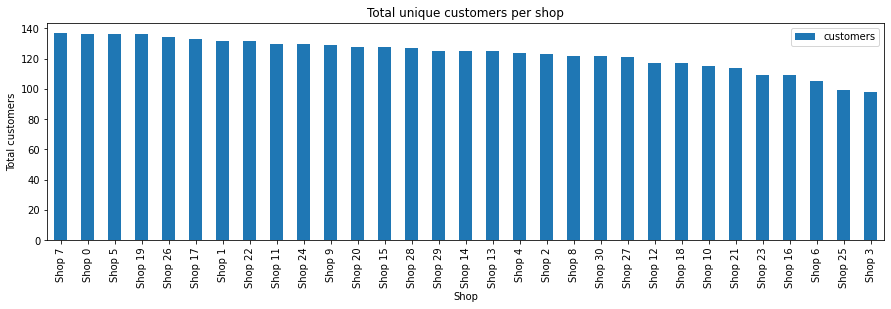

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = total_customers_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by total customers are: {}.\n'
      .format(top_shops_amount, top_shops_string))

total_customers_per_shop.plot(kind='bar', x='shop_id', y='customers', figsize=(15,4))
plt.title('Total unique customers per shop')
plt.ylabel('Total customers')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by total customers are: Shop 7, Shop 0, Shop 5, Shop 19, Shop 26.
- The numbers of the total customers are all very close, and are slowly dropping from around 140.

## Number of loyalty program customers

In [ ]:
# Assessing the performance of the stores by total number of loyalty program customers among the customers

# Calculating the total number of loyalty program customers among the customers of each store
# and sorting the stores by performance
unique_customers_and_loyalty_per_shop = data_purchases[['shop_id','customer_id','loyalty_program']] \
    .dropna().drop_duplicates()

total_loyalty_customers_per_shop = unique_customers_and_loyalty_per_shop.groupby('shop_id') \
    ['loyalty_program'].sum().to_frame().reset_index()

total_loyalty_customers_per_shop.columns = ['shop_id','loyalty_customers']
total_loyalty_customers_per_shop = \
    total_loyalty_customers_per_shop.sort_values('loyalty_customers', ascending=False) \
                         .reset_index() # Resetting index after sorting

print('Presenting the "total_customers_per_shop" dataframe:\n',
      total_customers_per_shop.head(5), '\n')

Presenting the "total_customers_per_shop" dataframe:
    shop_id  customers
0   Shop 7        137
1   Shop 0        136
2   Shop 5        136
3  Shop 19        136
4  Shop 26        134 



The top 5 shops by total number of loyalty program customers are: Shop 13, Shop 7, Shop 20, Shop 17, Shop 26.



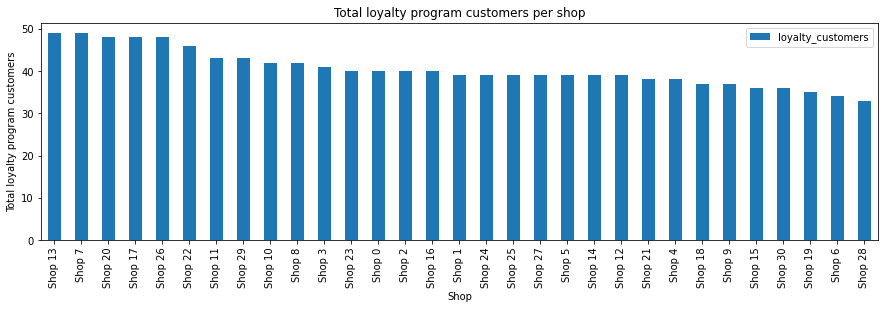

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = total_loyalty_customers_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by total number of loyalty program customers are: {}.\n'
      .format(top_shops_amount, top_shops_string))

total_loyalty_customers_per_shop.plot(kind='bar', x='shop_id', y='loyalty_customers', figsize=(15,4))
plt.title('Total loyalty program customers per shop')
plt.ylabel('Total loyalty program customers')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by total number of loyalty program customers are: Shop 13, Shop 7, Shop 20, Shop 17, Shop 26.
- The numbers of the loyalty program customers are still quite close relative to the previous metric, and are slowly dropping from around 50.

## Percent of loyalty program customers

In [ ]:
# Assessing the performance of the stores by number of loyalty program customers among the customers

# Calculating the number of loyalty program customers among the customers of each store
unique_customers_and_loyalty_per_shop = data_purchases[['shop_id','customer_id','loyalty_program']] \
    .dropna().drop_duplicates()

total_loyalty_customers_per_shop = unique_customers_and_loyalty_per_shop.groupby('shop_id') \
    ['loyalty_program'].sum().to_frame().reset_index()
total_loyalty_customers_per_shop.columns = ['shop_id','loyalty_customers']

# Calculating the percent of loyalty program customers among the customers of each store
# and sorting the stores by performance
percent_loyalty_customers_per_shop = \
    pd.merge(left=total_loyalty_customers_per_shop,
             right=total_customers_per_shop,
             how='inner',
             on='shop_id')

percent_loyalty_customers_per_shop['percent_loyalty_customers'] = \
    100 * percent_loyalty_customers_per_shop['loyalty_customers'] \
    / percent_loyalty_customers_per_shop['customers']

percent_loyalty_customers_per_shop = \
    percent_loyalty_customers_per_shop.sort_values('percent_loyalty_customers', ascending=False) \
                                  .reset_index(drop=True) # Resetting index after sorting

print('Presenting the "percent_loyalty_customers_per_shop" dataframe:\n',
      percent_loyalty_customers_per_shop.head(5), '\n')

Presenting the "percent_loyalty_customers_per_shop" dataframe:
    shop_id  loyalty_customers  customers  percent_loyalty_customers
0   Shop 3                 41         98                  41.836735
1  Shop 25                 39         99                  39.393939
2  Shop 13                 49        125                  39.200000
3  Shop 20                 48        128                  37.500000
4  Shop 23                 40        109                  36.697248 



The top 5 shops by percent of loyalty program customers are: Shop 3, Shop 25, Shop 13, Shop 20, Shop 23.



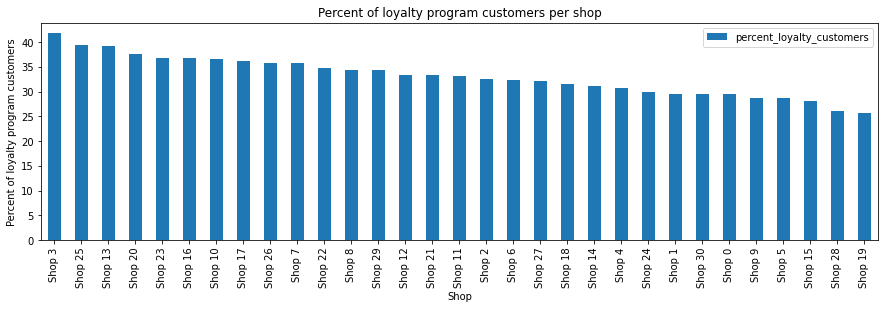

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = percent_loyalty_customers_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by percent of loyalty program customers are: {}.\n'
      .format(top_shops_amount, top_shops_string))

percent_loyalty_customers_per_shop.plot(kind='bar', x='shop_id', y='percent_loyalty_customers', figsize=(15,4))
plt.title('Percent of loyalty program customers per shop')
plt.ylabel('Percent of loyalty program customers')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by percent of loyalty program customers are: Shop 3, Shop 25, Shop 13, Shop 20, Shop 23.
- The percentages of the loyalty program customers are a little less close than in the previous metric, and are slowly dropping from around 40%.

## Total revenue

In [ ]:
# Assessing the performance of the stores by their total revenues

# Calculating the total revenue per store and sorting the stores by performance
total_purchases_revenue_per_shop = pd.pivot_table(data=data_purchases,
                                                  values='revenue',
                                                  index='shop_id',
                                                  aggfunc='sum')
total_purchases_revenue_per_shop = \
    total_purchases_revenue_per_shop.sort_values('revenue', ascending=False) \
                                  .reset_index() # Resetting index after sorting
total_purchases_revenue_per_shop.columns = ['shop_id','purchases_revenue']

print('Persenting the "total_purchases_revenue_per_shop" dateframe:')
print(total_purchases_revenue_per_shop.head(5), '\n')

# Adding the revenue from the payment for the royalty program
print('Presenting "total_loyalty_revenue_per_shop":\n',
      total_loyalty_revenue_per_shop.head(5), '\n')

total_revenue_per_shop = \
    pd.merge(left=total_purchases_revenue_per_shop,
             right=total_loyalty_revenue_per_shop,
             how='inner',
             on='shop_id')
total_revenue_per_shop['total_revenue'] = \
    total_revenue_per_shop['purchases_revenue'] + total_revenue_per_shop['loyalty_revenue']

print('Presenting the "total_revenue_per_shop" dataframe:\n',
      total_revenue_per_shop.head(5), '\n')

Persenting the "total_purchases_revenue_per_shop" dateframe:
   shop_id  purchases_revenue
0  Shop 15          112835.53
1   Shop 0          107579.26
2  Shop 21           96590.57
3   Shop 5           63868.38
4   Shop 4           41124.30 

Presenting "total_loyalty_revenue_per_shop":
    shop_id  loyalty_revenue
0   Shop 0              840
1   Shop 1              780
2  Shop 10              840
3  Shop 11              900
4  Shop 12              800 

Presenting the "total_revenue_per_shop" dataframe:
    shop_id  purchases_revenue  loyalty_revenue  total_revenue
0  Shop 15          112835.53              720      113555.53
1   Shop 0          107579.26              840      108419.26
2  Shop 21           96590.57              760       97350.57
3   Shop 5           63868.38              780       64648.38
4   Shop 4           41124.30              760       41884.30 



The top 5 shops by total revenue are: Shop 15, Shop 0, Shop 21, Shop 5, Shop 4.



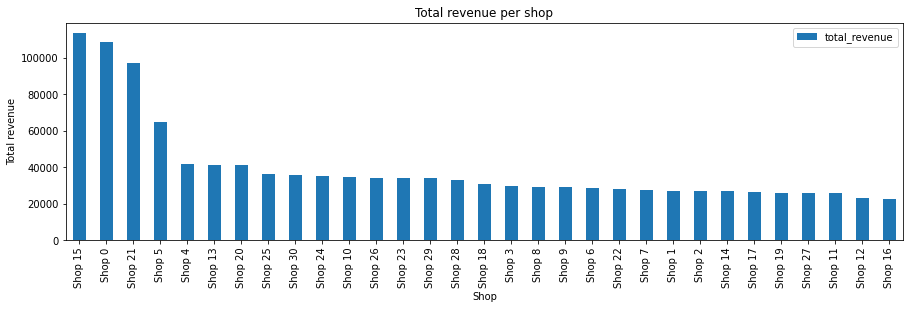

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = total_revenue_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by total revenue are: {}.\n'
      .format(top_shops_amount, top_shops_string))

total_revenue_per_shop.plot(kind='bar', x='shop_id', y='total_revenue', figsize=(15,4))
plt.title('Total revenue per shop')
plt.ylabel('Total revenue')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by total revenue are: Shop 15, Shop 0, Shop 21, Shop 5, Shop 4.
- There are big differences between the shops, where the top 3 shops have a total revenue with an order of magnitude of about 100k USD, but the shop at the 4th place is already around about 60k, and the 5th shop is at 40k.

## Average revenue per customer

In [ ]:
# Assessing the performance of the stores by the average revenue per customer

# Calculating the average revenue per customer and sorting the stores by performance
average_revenue_per_customer_per_shop = \
    pd.merge(left=total_revenue_per_shop,
             right=total_customers_per_shop,
             how='inner',
             on='shop_id')

average_revenue_per_customer_per_shop['average_revenue_per_customer'] = \
    average_revenue_per_customer_per_shop['total_revenue'] \
    / average_revenue_per_customer_per_shop['customers']

average_revenue_per_customer_per_shop = average_revenue_per_customer_per_shop \
                .sort_values('average_revenue_per_customer', ascending=False) \
                .reset_index(drop=True) # Resetting index after sorting

print('Persenting the "average_revenue_per_customer_per_shop" dateframe:')
print(average_revenue_per_customer_per_shop.head(5), '\n')

Persenting the "average_revenue_per_customer_per_shop" dateframe:
   shop_id  purchases_revenue  loyalty_revenue  total_revenue  customers  average_revenue_per_customer
0  Shop 15          112835.53              720      113555.53        128                    887.152578
1  Shop 21           96590.57              760       97350.57        114                    853.952368
2   Shop 0          107579.26              840      108419.26        136                    797.200441
3   Shop 5           63868.38              780       64648.38        136                    475.355735
4  Shop 25           35328.90              780       36108.90         99                    364.736364 



The top 5 shops by average revenue per customer are: Shop 15, Shop 21, Shop 0, Shop 5, Shop 25.



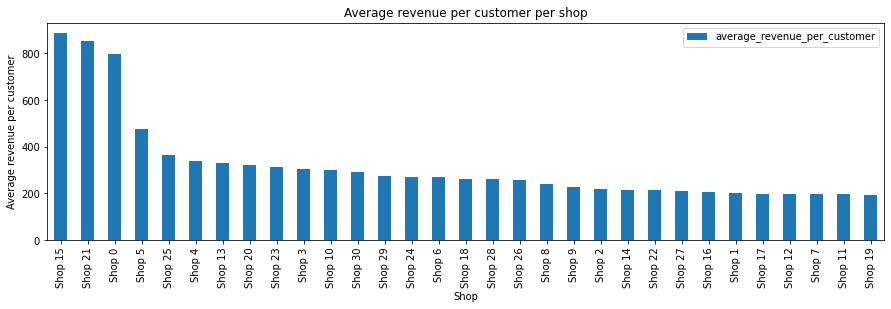

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = average_revenue_per_customer_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by average revenue per customer are: {}.\n'
      .format(top_shops_amount, top_shops_string))

average_revenue_per_customer_per_shop \
    .plot(kind='bar', x='shop_id', y='average_revenue_per_customer', figsize=(15,4))
plt.title('Average revenue per customer per shop')
plt.ylabel('Average revenue per customer')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by average revenue per customer are: Shop 15, Shop 21, Shop 0, Shop 5, Shop 25.
- There are big differences between the shops, where the top 3 shops have a revenue per customer of around 800 USD, but the shop at the 4th place is already around about 500.

## Total number of purchases

In [ ]:
# Assessing the performance of the stores by their number of total unique purchases

# Calculating the total unique purchases per store and sorting the stores by performance
total_purchases_per_shop = pd.pivot_table(data=data_purchases,
                                          values='purchase_id',
                                          index='shop_id',
                                          aggfunc='nunique')
total_purchases_per_shop.columns = ['purchases']
total_purchases_per_shop = total_purchases_per_shop.sort_values('purchases', ascending=False) \
                                  .reset_index() # Resetting index after sorting

print('Persenting the "total_purchases_per_shop" dateframe:')
print(total_purchases_per_shop.head(5), '\n')

Persenting the "total_purchases_per_shop" dateframe:
   shop_id  purchases
0   Shop 0        768
1   Shop 7        146
2   Shop 5        146
3  Shop 19        145
4  Shop 11        144 



The top 5 shops by total purchases are: Shop 0, Shop 7, Shop 5, Shop 19, Shop 11.



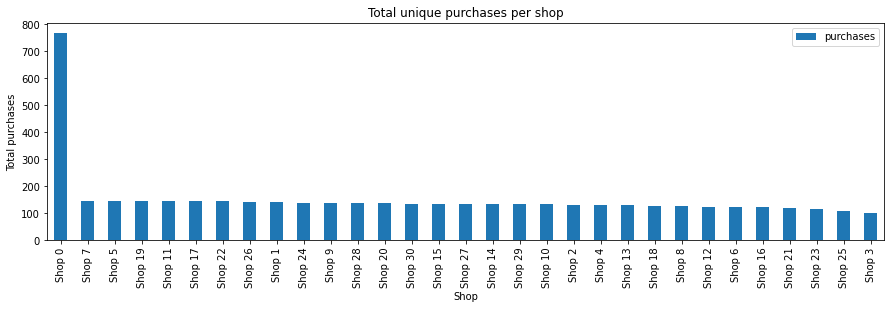

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = total_purchases_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by total purchases are: {}.\n'
      .format(top_shops_amount, top_shops_string))

total_purchases_per_shop.plot(kind='bar', x='shop_id', y='purchases', figsize=(15,4))
plt.title('Total unique purchases per shop')
plt.ylabel('Total purchases')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by total purchases are: Shop 0, Shop 7, Shop 5, Shop 19, Shop 11.
- There is only a big difference between the number of purchases of the 1st store and the rest of the stores, where in the 1st store there were about 750 purchases while in the rest of the stores there were about 150.

## Average number of purchases per customer

In [ ]:
# Assessing the performance of the stores by the average number of purchases per customer

# Calculating the average number of purchases per customer and sorting the stores by performance
average_purchases_per_customer_per_shop = \
    pd.merge(left=total_purchases_per_shop,
             right=total_customers_per_shop,
             how='inner',
             on='shop_id')

average_purchases_per_customer_per_shop['average_purchases_per_customer'] = \
    average_purchases_per_customer_per_shop['purchases'] \
    / average_purchases_per_customer_per_shop['customers']

average_purchases_per_customer_per_shop = average_purchases_per_customer_per_shop \
                .sort_values('average_purchases_per_customer', ascending=False) \
                .reset_index(drop=True) # Resetting index after sorting

print('Persenting the "average_purchases_per_customer_per_shop" dateframe:')
print(average_purchases_per_customer_per_shop.head(5), '\n')

Persenting the "average_purchases_per_customer_per_shop" dateframe:
   shop_id  purchases  customers  average_purchases_per_customer
0   Shop 0        768        136                        5.647059
1   Shop 6        123        105                        1.171429
2  Shop 10        132        115                        1.147826
3  Shop 16        121        109                        1.110092
4  Shop 11        144        130                        1.107692 



The top 5 shops by average purchases per customer are: Shop 0, Shop 6, Shop 10, Shop 16, Shop 11.



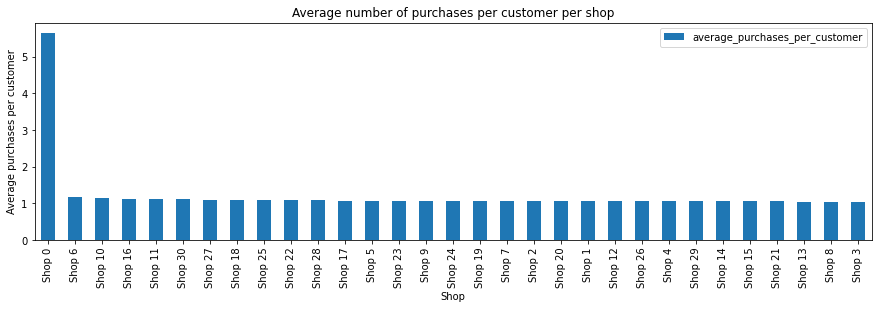

In [ ]:
# Presenting results
top_shops_amount = 5
top_shops_list = average_purchases_per_customer_per_shop.loc[0:top_shops_amount-1, 'shop_id'].tolist()
top_shops_string = ', '.join(top_shops_list)
print('The top {} shops by average purchases per customer are: {}.\n'
      .format(top_shops_amount, top_shops_string))

average_purchases_per_customer_per_shop \
    .plot(kind='bar', x='shop_id', y='average_purchases_per_customer', figsize=(15,4))
plt.title('Average number of purchases per customer per shop')
plt.ylabel('Average purchases per customer')
plt.xlabel('Shop')
plt.show()

- The top 5 shops by average purchases per customer are: Shop 0, Shop 6, Shop 10, Shop 16, Shop 11.
- There is only a big difference between the average number of purchases per customer of the 1st store and the rest of the stores, where in the 1st store there were about 5 purchases, while in the rest of the stores there was only about 1. 

## Conclusions

The results of the performance assessments according to metrics that are based on the number of customers are:
- The top 5 shops by total customers are: Shop 7, Shop 0, Shop 5, Shop 19, Shop 26.
- The numbers of the total customers are all very close, and are slowly dropping from around 140.
<br>

- The top 5 shops by total number of loyalty program customers are: Shop 13, Shop 7, Shop 20, Shop 17, Shop 26.
- The numbers of the loyalty program customers are still quite close relative to the previous metric, and are slowly dropping from around 50.
<br>

- The top 5 shops by percent of loyalty program customers are: Shop 3, Shop 25, Shop 13, Shop 20, Shop 23.
- The percentages of the loyalty program customers are a little less close than in the previous metric, and are slowly dropping from around 40%.
<br>

The results of the performance assessments according to metrics that are based on revenue are:
- The top 5 shops by total revenue are: Shop 15, Shop 0, Shop 21, Shop 5, Shop 4.
- There are big differences between the shops, where the top 3 shops have a total revenue with an order of magnitude of about 100k USD, but the shop at the 4th place is already around about 60k, and the 5th shop is at 40k.
<br>

- The top 5 shops by average revenue per customer are: Shop 15, Shop 21, Shop 0, Shop 5, Shop 25.
- There are big differences between the shops, where the top 3 shops have a revenue per customer of around 800 USD, but the shop at the 4th place is already around about 500.
<br>

The results of the performance assessments according to metrics that are based on the number of purchases are:
- The top 5 shops by total purchases are: Shop 0, Shop 7, Shop 5, Shop 19, Shop 11.
- There is only a big difference between the number of purchases of the 1st store and the rest of the stores, where in the 1st store there were about 750 purchases while in the rest of the stores there were about 150.
<br>

- The top 5 shops by average purchases per customer are: Shop 0, Shop 6, Shop 10, Shop 16, Shop 11.
- There is only a big difference between the average number of purchases per customer of the 1st store and the rest of the stores, where in the 1st store there were about 5 purchases, while in the rest of the stores there was only about 1. 
<br>

The most reliable methods to assess the performance of the shops should be based on their revenue. In general, looking at the revenue is good since the end goal of any chain is probably to maximize its profits. In our case we also saw that metrics which are based on the number of customers or purchases provide results which are too close to each other, plus these metrics don't have to fully correlate with the revenue, as we also saw.

Therefore, we conclude that the leading shops are Shop 15, Shop 0, Shop 21, Shop 5, and Shop 4, and we should further investigate their properties to see what they do differently than the rest of the shops and learn the characteristics of a successful shop.

# Testing hypotheses

## Removing outliers

In [ ]:
# Presenting the data
print('Presenting the "data_purchases" dataframe:\n',
      data_purchases.head(3), '\n')
print('The number of unique customers is {}.'
      .format(data_purchases['customer_id'].dropna().nunique()))

Presenting the "data_purchases" dataframe:
   purchase_id item_id  quantity       purchase_date  customer_id  loyalty_program shop_id product_id  price_per_one  revenue purchase_month
0      538280   21873        11 2016-12-10 12:50:00      18427.0                0  Shop 3      21873           0.42     4.62        2016-12
1      540418   21873         1 2017-01-07 11:04:00          NaN                0  Shop 0      21873           0.42     0.42        2017-01
2      541516   21873         2 2017-01-18 17:34:00          NaN                0  Shop 0      21873           0.42     0.84        2017-01 

The number of unique customers is 1740.


In [ ]:
# Calculating the number of purchases, number of purchased items and revenue per customer
data_customers = data_purchases.groupby('customer_id', as_index=False) \
                               .agg({'purchase_id': 'nunique',
                                     'quantity': 'sum',
                                     'revenue': 'sum'})
data_customers.columns = ['customer_id','purchases','purchased_items','revenue']

print('Presenting the "data_customers" dataframe:\n',
      data_customers.head(5), '\n\nLength =', len(data_customers))

Presenting the "data_customers" dataframe:
    customer_id  purchases  purchased_items    revenue
0      18025.0          2           148430  154367.20
1      18026.0          2              574     751.11
2      18027.0          2             1832     738.15
3      18029.0          1              180     194.36
4      18031.0          1               83     152.07 

Length = 1740


In [ ]:
# Finding anomalous customers with many purchases or very high revenues
# by calculating the 95th and 99th percentiles
anomalous_customers = pd.Series(data=None)
for value in data_customers.drop(columns=['customer_id']).columns:
    print('Finding anomalous customers by {}.\n'.format(value.replace('_', ' ')))
    values_per_customer = data_customers[['customer_id',value]]
    print('Presenting the "values_per_customer" dataframe:\n', values_per_customer.head(3), '\n')

    # Calculating the 95th and 99th percentiles
    values_percentiles = np.percentile(values_per_customer[value], [95, 99])
    print('The 95th and 99th percentiles of the values per customer are:', values_percentiles)

    # Defining the point at which a data point becomes an anomaly
    anomalous_values_threshold = values_percentiles[1]
    print('The threshold for an anomalous value is {:.3f}.'.format(anomalous_values_threshold))

    # Finding & saving the anomalous customers
    anomalous_customers_for_value = \
        values_per_customer.query(value + ' >= @anomalous_values_threshold')['customer_id']
    print('The number of anomalous customers by the {} value is {}.\n\n'
          .format(value, len(anomalous_customers_for_value)))
    anomalous_customers = pd.concat([anomalous_customers, anomalous_customers_for_value]) \
                               .drop_duplicates()

print('=> The total number of anomalous customers is {}.\n'.format(len(anomalous_customers)))
print('Presenting the "anomalous_customers" series:\n', anomalous_customers.head(3), '\n')

Finding anomalous customers by purchases.

Presenting the "values_per_customer" dataframe:
    customer_id  purchases
0      18025.0          2
1      18026.0          2
2      18027.0          2 

The 95th and 99th percentiles of the values per customer are: [ 7.   13.61]
The threshold for an anomalous value is 13.610.
The number of anomalous customers by the purchases value is 18.


Finding anomalous customers by purchased items.

Presenting the "values_per_customer" dataframe:
    customer_id  purchased_items
0      18025.0           148430
1      18026.0              574
2      18027.0             1832 

The 95th and 99th percentiles of the values per customer are: [1481.1  6991.04]
The threshold for an anomalous value is 6991.040.
The number of anomalous customers by the purchased_items value is 18.


Finding anomalous customers by revenue.

Presenting the "values_per_customer" dataframe:
    customer_id    revenue
0      18025.0  154367.20
1      18026.0     751.11
2      18027.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Filtering the data
data_customers_filtered = data_customers.query('customer_id not in @anomalous_customers')

print('Presenting the "data_customers_filtered" series:\n', data_customers_filtered.head(3), '\n')
print('The total number of customers is {}.'.format(data_customers['customer_id'].nunique()))
print('The number of anomalous customers is {}.'.format(anomalous_customers.shape[0]))
print('The total number of customers in the filtered data is {}.'
      .format(data_customers_filtered['customer_id'].nunique()))

Presenting the "data_customers_filtered" series:
    customer_id  purchases  purchased_items  revenue
1      18026.0          2              574   751.11
2      18027.0          2             1832   738.15
3      18029.0          1              180   194.36 

The total number of customers is 1740.
The number of anomalous customers is 32.
The total number of customers in the filtered data is 1708.


## Testing if loyalty program customers make more purchases

Testing the hypothesis that loyalty program customers make more purchases.

### Preparing test data

In [ ]:
# Grouping customers into a group of customers who belong to the loyalty program and a group of those who don't
print('Presenting the "customers_loyalty" dataframe:\n', customers_loyalty.head(3), '\n')

# Grouping customers
customers_not_in_loyalty = customers_loyalty.query('loyalty_program == 0')['customer_id'] # A series
customers_in_loyalty = customers_loyalty.query('loyalty_program == 1')['customer_id']

print('Presenting the "customers_not_in_loyalty" series:\n', customers_not_in_loyalty.head(3), '\n')
print('Presenting the "customers_in_loyalty" series:\n', customers_in_loyalty.head(3), '\n')

Presenting the "customers_loyalty" dataframe:
    customer_id  loyalty_program
0      18427.0                0
1      22182.0                1
2      22892.0                1 

Presenting the "customers_not_in_loyalty" series:
 0    18427.0
3    18520.0
4    20475.0
Name: customer_id, dtype: float64 

Presenting the "customers_in_loyalty" series:
 1    22182.0
2    22892.0
8    23133.0
Name: customer_id, dtype: float64 



The mean number of purchases for customers who aren't and who are in the
loyalty program are 2.105 and 2.116, respectively.

Describing "customers_not_in_loyalty_purchases":
count    1131.000000
mean        2.105217
std         1.849774
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
dtype: float64 



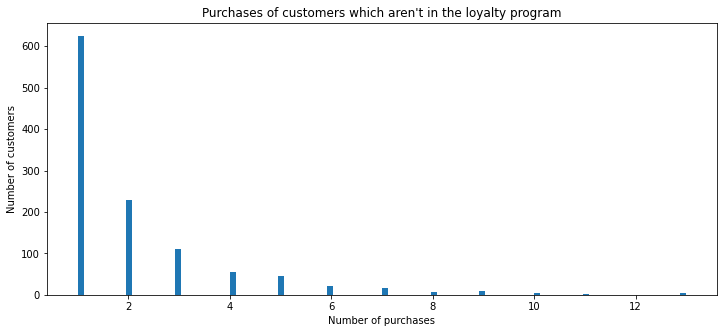


Describing "customers_in_loyalty_purchases":

count    577.000000
mean       2.116118
std        1.630450
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       10.000000
dtype: float64 



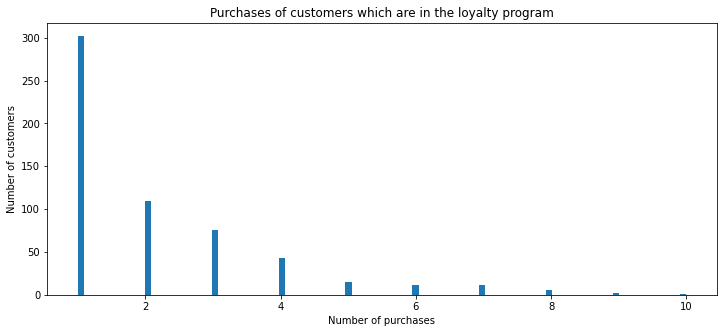

In [ ]:
# Calculating the number of purchases per customer in each group
customers_not_in_loyalty_purchases = \
    data_customers_filtered.query('customer_id in @customers_not_in_loyalty') \
                        ['purchases'].to_list()
customers_in_loyalty_purchases = \
    data_customers_filtered.query('customer_id in @customers_in_loyalty') \
                        ['purchases'].to_list()

# Exploring the test samples
print('''The mean number of purchases for customers who aren\'t and who are in the
loyalty program are {:.3f} and {:.3f}, respectively.\n'''
     .format(pd.Series(customers_not_in_loyalty_purchases).mean(),
             pd.Series(customers_in_loyalty_purchases).mean()))

print('Describing "customers_not_in_loyalty_purchases":')
print(pd.Series(customers_not_in_loyalty_purchases).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_not_in_loyalty_purchases, bins=100)
plt.title('Purchases of customers which aren\'t in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Number of purchases')
plt.show()
print()

print('Describing "customers_in_loyalty_purchases":\n')
print(pd.Series(customers_in_loyalty_purchases).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_in_loyalty_purchases, bins=100)
plt.title('Purchases of customers which are in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Number of purchases')
plt.show()

- The mean number of purchases for customers who aren't and who are in the
loyalty program are 2.105 and 2.116, respectively.

- The distribution of the number of purchases for both groups is peaked at 1 and is positively skewed, where only a small number of customers have 10 or more purchases.

- Very importantly, since the data isn't normally distributed, so we'll use the Mann–Whitney U test instead of the t-test to test the hypothesis.

### Testing hypothesis

In [ ]:
# Testing the hypothesis that loyalty program customers make more purchases
# by testing the equality of the means of the two populations the samples are taken from

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.\n''')
print('''The alternative hypothesis is that there is a statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.\n''')

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Calculating the p-value
results = st.mannwhitneyu(customers_not_in_loyalty_purchases,
                          customers_in_loyalty_purchases)
p_value = results.pvalue
print('The p-value is {:.3f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if p_value < alpha:
    print('''The null hypothesis is rejected - there is a statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.\n''')
else:
    print('''=> The null hypothesis can't be rejected - there is no statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.\n''')
    
# Printing the mean number of purchases per group
print('''The mean number of purchases of customers who aren't in the loyalty program
versus customers who are in it are {:.3f} and {:.3f}, respectively.'''
      .format(np.mean(customers_not_in_loyalty_purchases),
              np.mean(customers_in_loyalty_purchases)))

The null hypothesis is that there is no statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.

The alternative hypothesis is that there is a statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.

The critical statistical significance level is 0.05.

The p-value is 0.107.

=> The null hypothesis can't be rejected - there is no statistically significant difference
between the average number of purchases of customers who aren't and who are in the loyalty program.

The mean number of purchases of customers who aren't in the loyalty program
versus customers who are in it are 2.105 and 2.116, respectively.


### Conclusions

- The null hypothesis is that there is no statistically significant difference between the average number of purchases of customers who aren't and who are in the loyalty program.

- The alternative hypothesis is that there is a statistically significant difference between the average number of purchases of customers who aren't and who are in the loyalty program.

- The significance level, alpha, is chosen to be 0.05.

- The null hypothesis can't be rejected - there is no statistically significant difference between the average number of purchases of customers who aren't and who are in the loyalty program.

- The mean number of purchases of customers who aren't in the loyalty program versus customers who are in it are 2.105 and 2.116, respectively.

## Testing if loyalty program customers purchase more items

Testing the hypothesis that loyalty program customers purchase more items.

### Preparing test data

The mean number of purchased items for customers who aren't and who are in the
loyalty program are 335.090 and 328.095, respectively.

Describing "customers_not_in_loyalty_items":
count    1131.000000
mean      335.090186
std       483.596067
min         1.000000
25%        80.000000
50%       172.000000
75%       378.000000
max      4516.000000
dtype: float64 



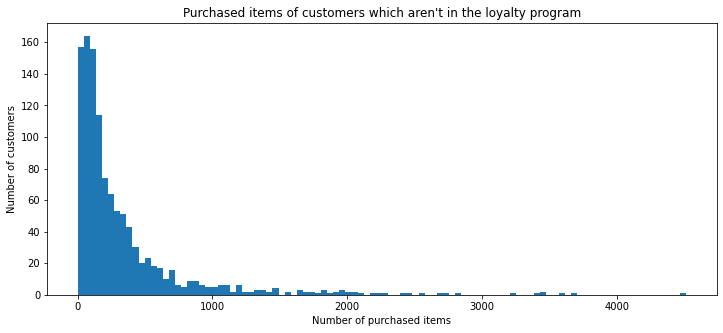


Describing "customers_in_loyalty_items":

count     577.000000
mean      328.095321
std       621.240062
min         1.000000
25%        75.000000
50%       163.000000
75%       352.000000
max      6952.000000
dtype: float64 



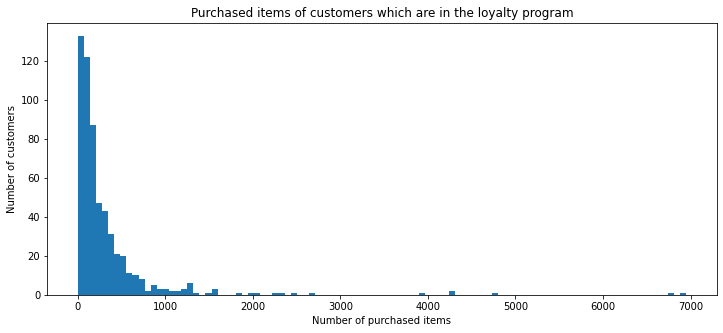

In [ ]:
# Calculating the number of purchased items per customer in each group
customers_not_in_loyalty_items = \
    data_customers_filtered.query('customer_id in @customers_not_in_loyalty') \
                        ['purchased_items'].to_list()
customers_in_loyalty_items = \
    data_customers_filtered.query('customer_id in @customers_in_loyalty') \
                        ['purchased_items'].to_list()

# Exploring the test samples
print('''The mean number of purchased items for customers who aren\'t and who are in the
loyalty program are {:.3f} and {:.3f}, respectively.\n'''
     .format(pd.Series(customers_not_in_loyalty_items).mean(),
             pd.Series(customers_in_loyalty_items).mean()))

print('Describing "customers_not_in_loyalty_items":')
print(pd.Series(customers_not_in_loyalty_items).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_not_in_loyalty_items, bins=100)
plt.title('Purchased items of customers which aren\'t in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Number of purchased items')
plt.show()
print()

print('Describing "customers_in_loyalty_items":\n')
print(pd.Series(customers_in_loyalty_items).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_in_loyalty_items, bins=100)
plt.title('Purchased items of customers which are in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Number of purchased items')
plt.show()

- The mean number of purchased items for customers who aren't and who are in the
loyalty program are 335.090 and 328.095, respectively.
- The distribution of the number of purchased items for both groups is peaked around 100 items and is positively skewed, where only a small number of customers have purched a 1000 or more items.
- Very importantly, since the data isn't normally distributed, so we'll use the Mann–Whitney U test instead of the t-test to test the hypothesis.

### Testing hypothesis

In [ ]:
# Testing the hypothesis that loyalty program customers purchase more items
# by testing the equality of the means of the two populations the samples are taken from

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.\n''')
print('''The alternative hypothesis is that there is a statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.\n''')

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Calculating the p-value
results = st.mannwhitneyu(customers_not_in_loyalty_items,
                          customers_in_loyalty_items)
p_value = results.pvalue
print('The p-value is {:.3f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if p_value < alpha:
    print('''The null hypothesis is rejected - there is a statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.\n''')
else:
    print('''=> The null hypothesis can't be rejected - there is no statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.\n''')
    
# Printing the mean number of purchases per group
print('''The mean number of purchased items of customers who aren't in the loyalty program
versus customers who are in it are {:.3f} and {:.3f}, respectively.'''
      .format(np.mean(customers_not_in_loyalty_items),
              np.mean(customers_in_loyalty_items)))

The null hypothesis is that there is no statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.

The alternative hypothesis is that there is a statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.

The critical statistical significance level is 0.05.

The p-value is 0.102.

=> The null hypothesis can't be rejected - there is no statistically significant difference
between the average number of purchased items of customers who aren't and who are in the loyalty program.

The mean number of purchased items of customers who aren't in the loyalty program
versus customers who are in it are 335.090 and 328.095, respectively.


### Conclusions

- The null hypothesis is that there is no statistically significant difference between the average number of purchased items of customers who aren't and who are in the loyalty program.

- The alternative hypothesis is that there is a statistically significant difference between the average number of purchased items of customers who aren't and who are in the loyalty program.

- The significance level, alpha, is chosen to be 0.05.

- The null hypothesis can't be rejected - there is no statistically significant difference between the average number of purchased items of customers who aren't and who are in the loyalty program.

- The mean number of purchased items of customers who aren't in the loyalty program versus customers who are in it are 335.090 and 328.095, respectively.

## Testing if loyalty program customers bring in higher revenues

Testing the hypothesis that loyalty program customers bring in higher revenues.

### Preparing test data

The mean revenue for customers who aren't and who are in the
loyalty program are 407.904 and 356.994, respectively.

Describing "customers_not_in_loyalty_revenue":
count    1131.000000
mean      407.904385
std       582.053637
min         0.000000
25%       102.955000
50%       211.960000
75%       459.360000
max      5953.420000
dtype: float64 



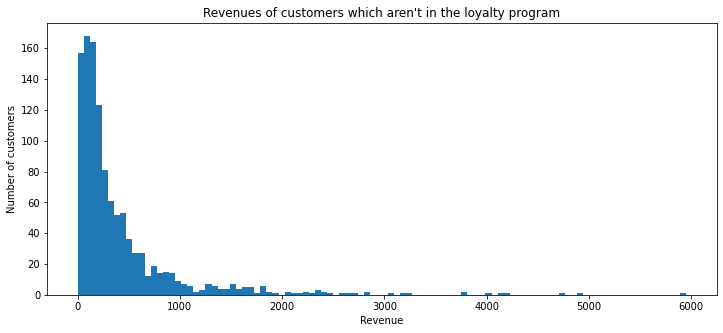


Describing "customers_in_loyalty_revenue":

count     577.000000
mean      356.994298
std       552.762412
min         0.000000
25%        89.080000
50%       198.650000
75%       379.840000
max      7536.080000
dtype: float64 



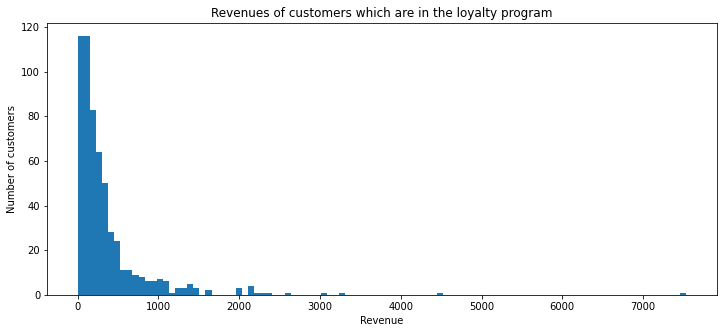

In [ ]:
# Calculating the revenue per customer in each group
customers_not_in_loyalty_revenue = \
    data_customers_filtered.query('customer_id in @customers_not_in_loyalty') \
                        ['revenue'].to_list()
customers_in_loyalty_revenue = \
    data_customers_filtered.query('customer_id in @customers_in_loyalty') \
                        ['revenue'].to_list()

# Exploring the test samples
print('''The mean revenue for customers who aren\'t and who are in the
loyalty program are {:.3f} and {:.3f}, respectively.\n'''
     .format(pd.Series(customers_not_in_loyalty_revenue).mean(),
             pd.Series(customers_in_loyalty_revenue).mean()))

print('Describing "customers_not_in_loyalty_revenue":')
print(pd.Series(customers_not_in_loyalty_revenue).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_not_in_loyalty_revenue, bins=100)
plt.title('Revenues of customers which aren\'t in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Revenue')
plt.show()
print()

print('Describing "customers_in_loyalty_revenue":\n')
print(pd.Series(customers_in_loyalty_revenue).describe(), '\n')

plt.figure(figsize=(12,5))
plt.hist(customers_in_loyalty_revenue, bins=100)
plt.title('Revenues of customers which are in the loyalty program')
plt.ylabel('Number of customers')
plt.xlabel('Revenue')
plt.show()

- The mean revenue for customers who aren't and who are in the
loyalty program are 407.904 and 356.994, respectively.
- The distribution of the revenues for both groups is peaked under about 100 USD and is positively skewed, where only a small number of customers bring in a revenue of over 1000 USD, but there are outlier customers who bring in even over 5000 USD.
- Very importantly, since the data isn't normally distributed, so we'll use the Mann–Whitney U test instead of the t-test to test the hypothesis.

### Testing hypothesis

In [ ]:
# Testing the hypothesis that loyalty program customers bring in higher revenues
# by testing the equality of the means of the two populations the samples are taken from

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.\n''')
print('''The alternative hypothesis is that there is a statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.\n''')

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Calculating the p-value
results = st.mannwhitneyu(customers_not_in_loyalty_revenue,
                          customers_in_loyalty_revenue)
p_value = results.pvalue
print('The p-value is {:.3f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if p_value < alpha:
    print('''The null hypothesis is rejected - there is a statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.\n''')
else:
    print('''=> The null hypothesis can't be rejected - there is no statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.\n''')

# Printing the mean revenue per group
print('''The mean revenue of customers who aren't in the loyalty program
versus customers who are in it are {:.2f} USD and {:.2f} USD, respectively.'''
      .format(np.mean(customers_not_in_loyalty_revenue),
              np.mean(customers_in_loyalty_revenue)))

The null hypothesis is that there is no statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.

The alternative hypothesis is that there is a statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.

The critical statistical significance level is 0.05.

The p-value is 0.026.

The null hypothesis is rejected - there is a statistically significant difference
between the average revenue of customers who aren't and who are in the loyalty program.

The mean revenue of customers who aren't in the loyalty program
versus customers who are in it are 407.90 USD and 356.99 USD, respectively.


### Conclusions

- The null hypothesis is that there is no statistically significant difference between the average revenue of customers who aren't and who are in the loyalty program.

- The alternative hypothesis is that there is a statistically significant difference between the average revenue of customers who aren't and who are in the loyalty program.

- The significance level, alpha, is chosen to be 0.05.

- The null hypothesis is rejected - there is a statistically significant
difference between the average revenue of customers who aren't and who are in the loyalty program.

- The mean revenue of customers who aren't in the loyalty program
versus customers who are in it are 407.904 and 356.994, respectively.

# Conclusions & recommendations

Conclusions:

- The most reliable methods to assess the performance of the shops should be based on their revenue.
- Consequently, the leading shops are Shop 15, Shop 0, Shop 21, Shop 5, and Shop 4.

---

- When testing if loyalty program customers make more purchases, the null hypothesis can't be rejected - there is no statistically significant difference between the average number of purchases of customers who aren't and who are in the loyalty program.
- When testing if loyalty program customers purchase more items, the null hypothesis can't be rejected - there is no statistically significant difference between the average number of purchased items of customers who aren't and who are in the loyalty program.
- When testing if loyalty program customers bring in higher revenues, the null hypothesis is rejected - there is a statistically significant difference between the average revenue of customers who aren't and who are in the loyalty program.
- The mean revenue of customers who aren't in the loyalty program versus customers who are in it are 407.90 USD and 356.99 USD, respectively.
- Consequently, it is not better for a store to acquire more loyalty program customers.

Recommendations for improving the performance of the stores and increasing the profits of the chain:

- Shift the attention of the stores to maximizing the total revenue over the other metrics as the top priority.

- Find how to increase the profits from loyalty program customers, for example by increasing its cost, since currently the mean revenue from customers who aren't in the loyalty program is greater than that of the loyalty program customers.

- Further investigate the properties of the leading stores to see what they do differently than the rest of the shops and learn the characteristics of a successful shop.

- Further investigate the properties of the least successful stores to see what they do differently in order to avoid making incorrect business decisions.


# Presentation link

A presentation which showcases the findings can be found in the following link: \

https://drive.google.com/file/d/1iw_lhwSL4Eh63sQkfZoABCVlkjD6uu2_/view?usp=sharing

# Dashboard link

A Tableau dashboard which showcases the assessment of the stores' performance can be found in the following link: \

https://public.tableau.com/views/StoresPerformanceAssessmentv2/StoresPerformance?:language=en-US&:display_count=n&:origin=viz_share_link

# Project's sources

I have used the following sources for this project:

- For choosing the metrics that can be applicable to the goal of assessing the performance of stores: \
https://onstrategyhq.com/resources/27-examples-of-key-performance-indicators/ \
https://www.clearpointstrategy.com/18-key-performance-indicators/ \
https://www.nibusinessinfo.co.uk/content/use-kpis-assess-business-performance

- For collecting, grouping and aggregating the required data which was used for assessing the perfomance of the stores: \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

- For presenting the results of the performance assessment of the stores: \
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

- For choosing a method for removing anomalous customers who have outlier values in their properties: \
https://medium.com/nerd-for-tech/outliers-detection-techniques-85e0a5d1c3c4

- For removing anomalous customers by calculating the 95th and the 99th percentiles for the different properties of the customers: \
https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

- For performing the statistical hypothesis tests regarding the differences between the customers who are and aren't in the loyalty program: \
https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test \
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
